In [1]:
from scipy.io import loadmat
import numpy as np

Indian pines

In [2]:
ipx = loadmat('/content/drive/MyDrive/Indian_pines_corrected.mat')['indian_pines_corrected']
ipy = loadmat('/content/drive/MyDrive/Indian_pines_gt.mat')['indian_pines_gt']
ipx.shape,ipy.shape

((145, 145, 200), (145, 145))

Pavia


In [3]:
px = loadmat('/content/drive/MyDrive/Pavia.mat')['pavia']
py = loadmat('/content/drive/MyDrive/Pavia_gt.mat')['pavia_gt']
px.shape,py.shape

((1096, 715, 102), (1096, 715))

Target

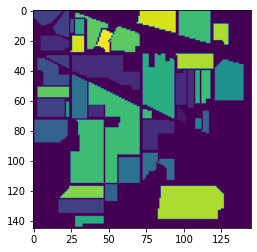

In [4]:
import matplotlib.pyplot as plt
plt.imshow(ipy)

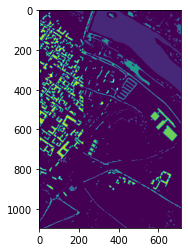

In [5]:
plt.imshow(py)

**INDIAN PINES**



Preprocessing

In [6]:
np.unique(ipy)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [7]:
ipx = ipx.reshape(145*145,200,1)
ipy = ipy.reshape(145*145)
ipx.shape,ipy.shape

((21025, 200, 1), (21025,))

In [8]:
from keras.utils import to_categorical
ipy = to_categorical(ipy)
ipy.shape

(21025, 17)

Model

In [9]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense

In [10]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(200,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(99,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(48,32)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(17, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 198, 16)           64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 99, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 97, 32)            1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 48, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 46, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 23, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1472)              0

Training and comipiling - indian pines

In [11]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ipx.reshape(-1,200,1), ipy, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16820, 200, 1), (16820, 17), (4205, 200, 1), (4205, 17))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size= 5)

Epoch 1/5
3364/3364 [==============================] - 18s 5ms/step - loss: 3.7034 - accuracy: 0.5351 - val_loss: 1.3299 - val_accuracy: 0.5750
Epoch 2/5
3364/3364 [==============================] - 18s 5ms/step - loss: 1.2683 - accuracy: 0.5743 - val_loss: 1.2265 - val_accuracy: 0.5864
Epoch 3/5
3364/3364 [==============================] - 18s 5ms/step - loss: 1.1935 - accuracy: 0.5911 - val_loss: 1.1821 - val_accuracy: 0.5886
Epoch 4/5
3364/3364 [==============================] - 18s 5ms/step - loss: 1.1498 - accuracy: 0.5992 - val_loss: 1.1479 - val_accuracy: 0.6095
Epoch 5/5
3364/3364 [==============================] - 18s 5ms/step - loss: 1.1273 - accuracy: 0.6011 - val_loss: 1.1303 - val_accuracy: 0.6024


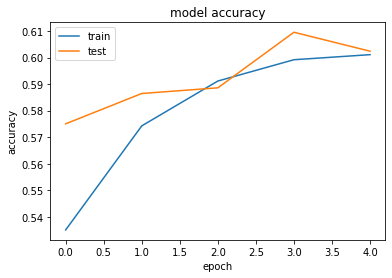

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

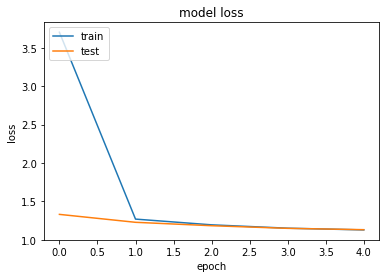

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**PAVIA**

In [15]:
px.shape,py.shape

((1096, 715, 102), (1096, 715))

In [16]:
px = px.reshape(1096*715,102,1)
py = py.reshape(1096*715)
px.shape,py.shape

((783640, 102, 1), (783640,))

In [17]:
np.unique(py)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
py = to_categorical(py)
py.shape

(783640, 10)

Model

In [19]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(102,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(50,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 100, 16)           64        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 50, 16)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 48, 32)            1568      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               76900     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [21]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(px, py, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((548548, 102, 1), (548548, 10), (235092, 102, 1), (235092, 10))

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
17143/17143 [==============================] - 106s 6ms/step - loss: 0.4992 - accuracy: 0.8740 - val_loss: 0.3043 - val_accuracy: 0.8826
Epoch 2/5
17143/17143 [==============================] - 108s 6ms/step - loss: 0.2955 - accuracy: 0.8839 - val_loss: 0.2917 - val_accuracy: 0.8848
Epoch 3/5
17143/17143 [==============================] - 107s 6ms/step - loss: 0.2825 - accuracy: 0.8862 - val_loss: 0.2805 - val_accuracy: 0.8879
Epoch 4/5
17143/17143 [==============================] - 113s 7ms/step - loss: 0.2775 - accuracy: 0.8877 - val_loss: 0.2814 - val_accuracy: 0.8873
Epoch 5/5
17143/17143 [==============================] - 109s 6ms/step - loss: 0.2746 - accuracy: 0.8884 - val_loss: 0.2678 - val_accuracy: 0.8897


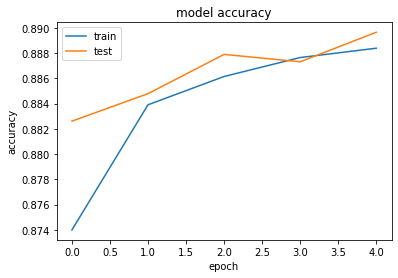

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

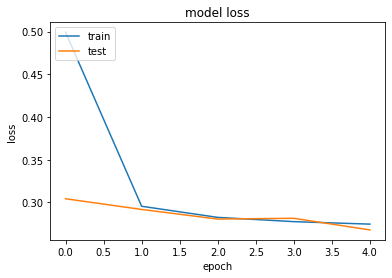

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dimension Reduction

In [25]:
px = px.reshape(-1,102)
px.shape,py.shape

((783640, 102), (783640, 10))

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(px)
reduced_px = pca.transform(px)

In [27]:
reduced_px = reduced_px.reshape(-1,50,1) 

In [28]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(50,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(24,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 48, 16)            64        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 24, 16)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 22, 32)            1568      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 11, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 352)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3530      
Total params: 5,162
Trainable params: 5,162
Non-trainable params: 0
____________________________________________________

In [29]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_px, py, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((548548, 50, 1), (548548, 10), (235092, 50, 1), (235092, 10))

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
17143/17143 [==============================] - 63s 4ms/step - loss: 0.7081 - accuracy: 0.8628 - val_loss: 0.3194 - val_accuracy: 0.8804
Epoch 2/5
17143/17143 [==============================] - 64s 4ms/step - loss: 0.3137 - accuracy: 0.8778 - val_loss: 0.2962 - val_accuracy: 0.8824
Epoch 3/5
17143/17143 [==============================] - 65s 4ms/step - loss: 0.3068 - accuracy: 0.8793 - val_loss: 0.2946 - val_accuracy: 0.8830
Epoch 4/5
17143/17143 [==============================] - 68s 4ms/step - loss: 0.3048 - accuracy: 0.8803 - val_loss: 0.2986 - val_accuracy: 0.8819
Epoch 5/5
17143/17143 [==============================] - 66s 4ms/step - loss: 0.3032 - accuracy: 0.8805 - val_loss: 0.3209 - val_accuracy: 0.8829
